In [1]:
from keras.layers import Dot
from keras.layers import Input, Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Model
import keras.backend as K

Using TensorFlow backend.


这里我们假定已经对文本集进行了词索引向量化

In [2]:
# 词汇表大小
vocab_size = 5000
# 输出向量维度
embed_size = 50

# 构建词向量网络模型
word_input = Input(shape=(1,))  # 输入为中心的索引
word_embedding = Embedding(input_dim=vocab_size,  # 词汇表长度
                           output_dim=embed_size,  # 输出词语向量维度为50维
                           embeddings_initializer="glorot_uniform",  # 权重初始化方法
                           input_length=1)(word_input) # 输入只有1个词占1行因此设置input_length=1
word_embedding_reshape = Reshape((embed_size,))(word_embedding)


# 构建上下文向量网络模型
context_input = Input(shape=(2,))
context_embedding = Embedding(input_dim=vocab_size, 
                              output_dim=embed_size,
                              embeddings_initializer="glorot_uniform",
                              input_length=2)(context_input)
# 注意：最终的向量输出维度的第一个维度的尺寸是数据批量的大小，从第二个维度开始指定输出向量的维度大小
context_embedding_reshape = Reshape((embed_size,-1))(context_embedding)  

# 合并
merge_layer = Dot(axes=1)([word_embedding_reshape, context_embedding_reshape])
# 判断是否构成上下文关系
outputs_layer = Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid")(merge_layer)

model = Model(inputs=[word_input, context_input], outputs=outputs_layer)
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 300)       1500000     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 2, 300)       1500000     input_2[0][0]                    
___________________________________________________________________________________________

In [3]:
from keras.utils import plot_model

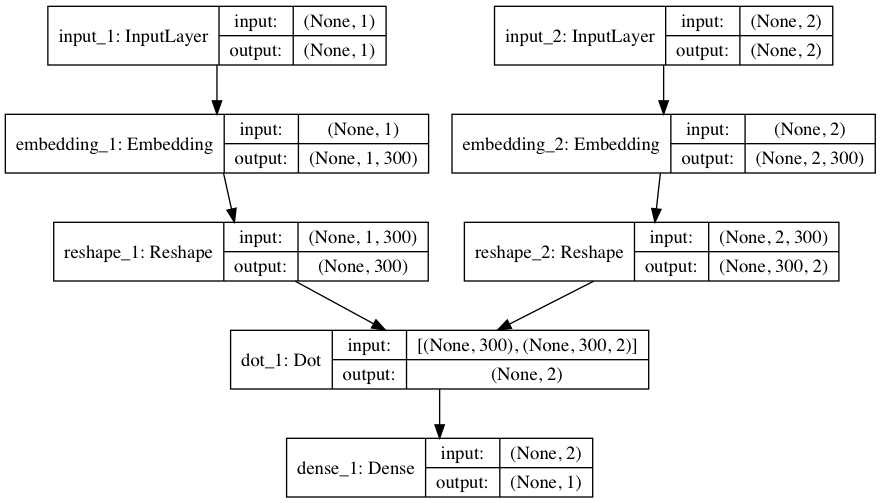

In [4]:
plot_model(model, to_file='skip_gram.png', show_shapes=True)